In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
sessions = pd.read_json("data/sessions.jsonl", lines=True)
artists = pd.read_json("data/artists.jsonl", lines=True)
tracks = pd.read_json("data/tracks.jsonl", lines=True)
track_storage = pd.read_json("data/track_storage.jsonl", lines=True)
users = pd.read_json("data/users.jsonl", lines=True)


# Users analyzys

In [7]:
users

,user_id,name,city,street,favourite_genres,premium_user,id
0,101,Kazimierz Gniewek,Kraków,aleja Liliowa 48/22,"[pop, alternative rock, argentine rock]",1.0,NaN
1,102,Dorota Flisek,Warszawa,pl. Słoneczna 80/07,"[europop, latin rock, post-teen pop]",1.0,NaN
2,103,Anna Maria Bystrek,Warszawa,ul. Turystyczna 334,None,1.0,NaN
3,104,Bruno Kryszkiewicz,Wrocław,al. Piekarska 738,"[new wave, motown, psychedelic rock]",1.0,NaN
4,105,Melania Frukacz,Gdynia,plac Błękitna 89/97,"[rock en espanol, alternative rock, lounge]",1.0,NaN
5,106,Emil Smal,Warszawa,plac Maczka 88/01,"[metal, ranchera, motown]",1.0,NaN
6,107,Kalina Ambrozik,Szczecin,pl. Krótka 034,None,1.0,NaN
7,108,Paweł Kucharz,Poznań,aleja Dworska 69/95,"[tropical, dance pop, latin]",1.0,NaN
8,109,Marcel Szelest,Kraków,ulica Kosynierów 677,None,1.0,NaN
9,110,Jakub Stanuch,Wrocław,pl. Zakątek 07,"[vocal jazz, alternative metal, country rock]",1.0,NaN


<Axes: xlabel='count', ylabel='favourite_genres'>

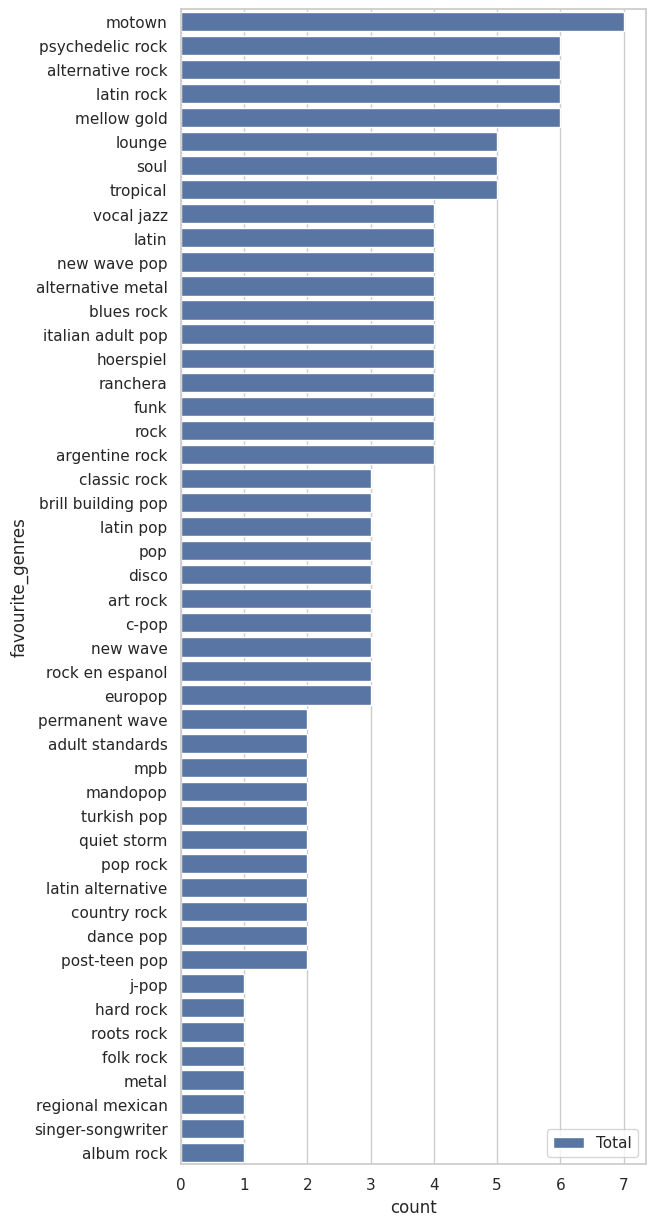

In [4]:
f, ax = plt.subplots(figsize=(6, 15))
generes_stats = users.explode("favourite_genres")['favourite_genres'].value_counts().reset_index()

sns.set_color_codes("pastel")
sns.barplot(x="count", y="favourite_genres", data=generes_stats, label="Total")



<Axes: xlabel='city', ylabel='count'>

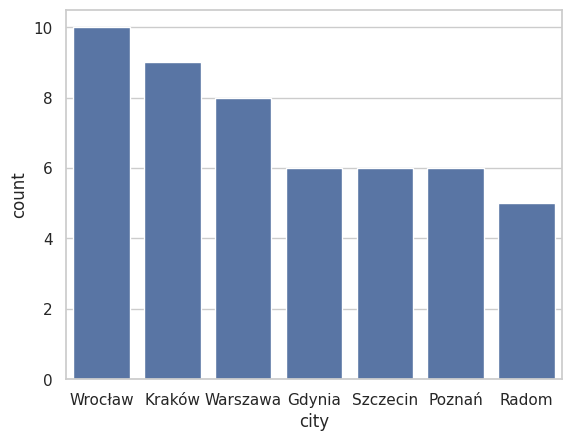

In [46]:
cities = users['city'].value_counts().reset_index()
sns.barplot(cities, x="city", y="count")


# Tracks

In [5]:
tracks

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7sj6ynHVC4yVa7xJUYoD97,เพียงก่อนนั้น,12,236583,0,5pLJF8oFCs1YpPZaARy1Cz,1986-01-01,0.514,0.2720,4,0.0,-14.678,0.0249,0.732000,0.544000,0.1130,0.1260,90.077,4
1,7GDczVNdqle26Ff2LrzsLr,עתיד מתוק,27,223800,0,7iE2GZiF0xVFzlA2E93m3g,1985-11-01,0.654,0.8420,4,0.0,-7.279,0.0360,0.381000,0.011300,0.1300,0.7650,142.966,4
2,4AyUgUtX0nMsBjzZFDWVgM,スピード,28,287831,0,2DiecQcRbDuSJuSPKtirrX,1991-02-21,0.452,0.9610,9,1.0,-3.379,0.0704,0.083100,0.000322,0.0851,0.4680,132.790,4
3,4gxYRhp7DeB11eC5VQOJ7w,Wir ham' noch lange nicht genug,57,292000,0,6x9jRPDmA8Ihpw3A9FBowD,1991,0.555,0.7220,0,1.0,-11.298,0.0271,0.000767,0.000027,0.0813,0.6590,148.105,4
4,78Eqonqp6yxXuYQtnffk0W,Faço Como,43,201253,0,7gsMzXapXdZ5XzVPJp4rBd,2018-05-19,0.715,0.4020,0,0.0,-11.527,0.1490,0.350000,0.345000,0.1060,0.2460,183.948,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,5FWbKOPrGinhW9TNiyD3Qz,Lorelay,5,224760,0,4zaslnpNr10iUFJGx0XqpM,1978,0.264,0.4050,0,NaN,-7.925,0.0295,0.844000,0.000006,0.1150,0.0765,72.999,4
21604,1XiyW1CAoo5jfsiq941XMe,סעידה סולטנה,13,280560,0,03IVYRlAC972SOHPb86Usr,1998-01-01,0.849,0.6780,1,NaN,-9.047,0.0515,0.001470,0.114000,0.1560,0.8010,116.081,4
21605,1mlzd3LMQXBTCGTzu24rcO,Zo klein als ik ben,21,80093,0,62lP9hgxTVphRNmeREeFdC,1986-10-01,0.680,0.0792,7,NaN,-17.518,0.0815,0.933000,0.000000,0.1040,0.5490,94.748,4
21606,54jLw1x7AdfEhGF7JEcUKE,New Church,23,212200,0,5JEhWD9S2znCiQRiGj2OUk,1982-01-01,0.414,0.8930,9,NaN,-5.465,0.0533,0.000183,0.003490,0.1530,0.4070,91.330,4


# Sessions

In [6]:
sessions_events = sessions.groupby(sessions['event_type'])
sessions_events.count()

,timestamp,user_id,track_id,session_id
event_type,,,,
advertisement,4056,4056,4056,4056
buy_premium,15,15,15,15
like,3315,3315,3315,3315
play,12743,12743,12743,12743
skip,4362,4362,4362,4362


In [3]:
sessions

,timestamp,user_id,track_id,event_type,session_id
0,2023-01-02 05:58:46.000,101,0jNxo9JcSNcyrYW6AIJhIz,play,124
1,2023-01-02 06:04:59.656,101,0jNxo9JcSNcyrYW6AIJhIz,like,124
2,2023-01-02 06:06:03.813,101,3xfmdZVopiPhbqENrH1XOL,play,124
3,2023-01-02 06:07:45.225,101,3xfmdZVopiPhbqENrH1XOL,like,124
4,2023-01-02 06:08:00.920,101,59m93IlJ9N9dOjAZIm9NzY,play,124
...,...,...,...,...,...
24486,2023-10-28 22:21:14.817,150,0zlnHTHiBQ68ZCAmTw5ozm,skip,820
24487,2023-10-28 22:21:14.817,150,,advertisement,820
24488,2023-10-28 22:21:41.817,150,3dPQuX8Gs42Y7b454ybpMR,play,820
24489,2023-10-28 22:24:53.665,150,3dPQuX8Gs42Y7b454ybpMR,skip,820


In [5]:
clean_sessions = sessions[(sessions['track_id']!='') & (sessions['track_id'].notna())]
clean_sessions.loc[:, 'timestamp'] = pd.to_datetime(clean_sessions['timestamp'])
clean_sessions.loc[:, 'hour'] = clean_sessions['timestamp'].dt.hour
clean_sessions.set_index('timestamp', inplace=True)

/tmp/ipykernel_2534/4108665204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_sessions.loc[:, 'hour'] = clean_sessions['timestamp'].dt.hour


,user_id,track_id,event_type,session_id,hour
timestamp,,,,,
2023-04-24 04:02:43.669,101.0,3hQT53VbsScHcmOgZZs9I7,like,124,4
2023-04-24 04:02:57.655,101.0,3hQT53VbsScHcmOgZZs9I7,skip,124,4
2023-04-24 04:03:39.655,101.0,2KohkbD7fu6sa1Mxz5NeFr,play,124,4
2023-04-24 04:07:48.695,101.0,2GZBncCaP8L8jAOo93XjDH,play,124,4
2023-04-24 04:10:46.868,NaN,3po2nFrWJEIwH3ByiPXWmr,play,124,4
...,...,...,...,...,...
2023-09-16 11:28:41.977,150.0,56kjnMnWRfJ1HbrW7fu2FE,None,809,11
2023-09-16 11:32:14.634,150.0,56kjnMnWRfJ1HbrW7fu2FE,like,809,11
2023-09-21 01:38:14.000,150.0,2Qe6sQ4SFct5d17w89xoHi,play,810,1


/tmp/ipykernel_2534/4197798183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_ses['date'] = ts_ses.index.date


<Axes: xlabel='count', ylabel='hour'>

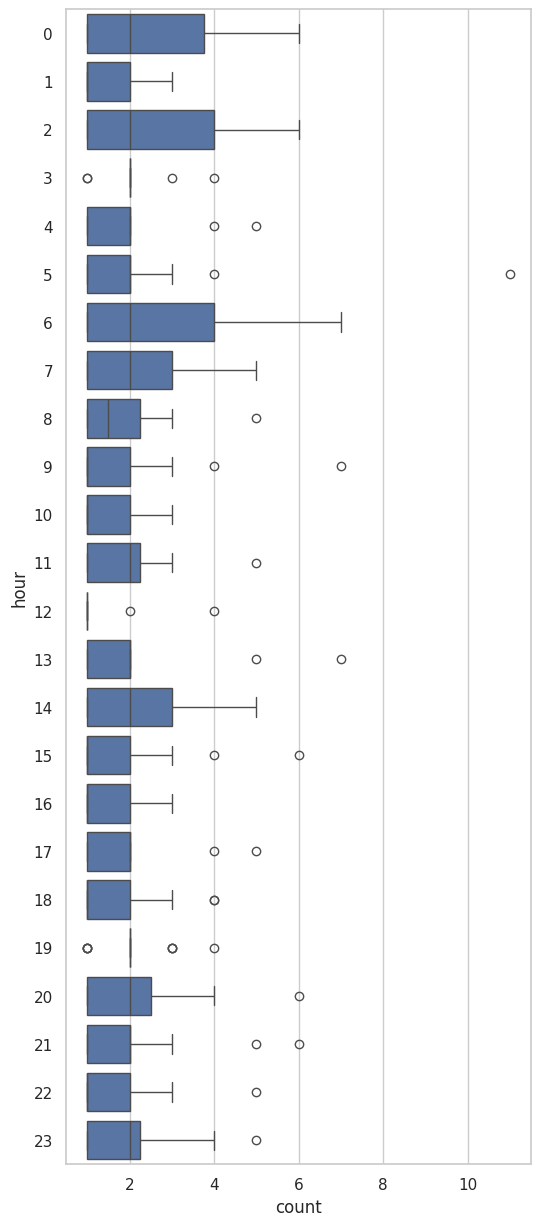

In [94]:
f, ax = plt.subplots(figsize=(6, 15))
ts_ses = clean_sessions[clean_sessions['event_type']=='skip']
ts_ses['date'] = ts_ses.index.date
df = ts_ses.groupby(['date', 'hour']).size().reset_index(name="count")

sns.boxplot(df, y='hour', x='count', orient='h')




<Axes: xlabel='session_start', ylabel='duration'>

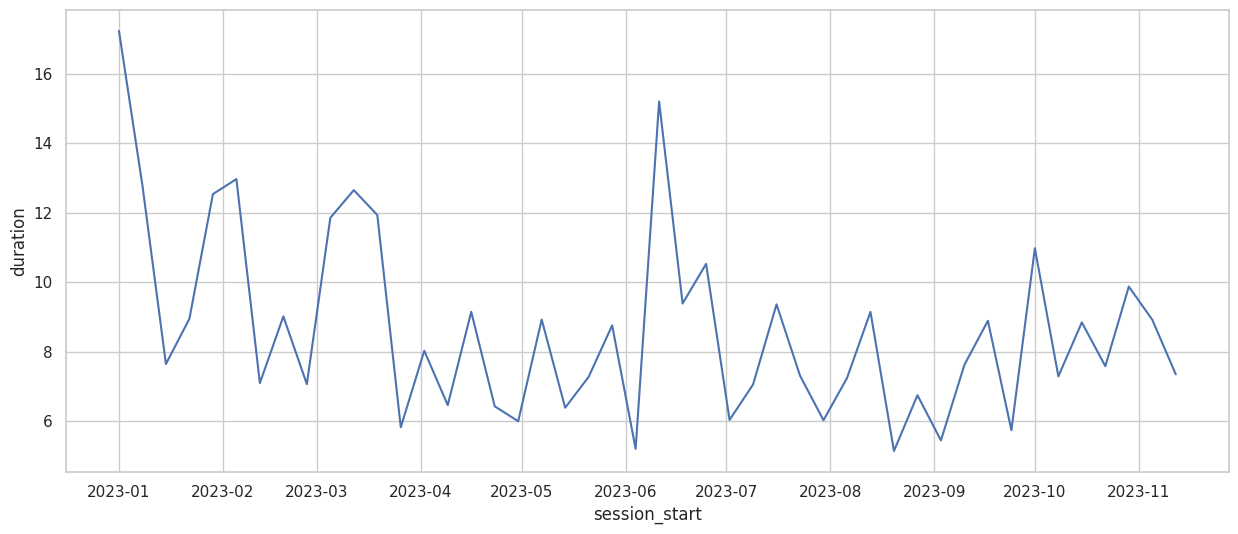

In [44]:
 clean_sessions['ts'] = clean_sessions.index
 sessions = clean_sessions.groupby('session_id').agg(session_start=('ts', 'min'), session_end=('ts', 'max')).assign(duration=lambda x: x['session_end'] - x['session_start']).reset_index()
 mean_session = sessions.resample('W', on="session_start").duration.mean().reset_index()
 mean_session['session_start'] = pd.to_datetime(mean_session['session_start'])
 mean_session['duration'] = mean_session.duration.dt.total_seconds().fillna(0) /60
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(mean_session, x='session_start', y='duration')

In [55]:
v_cl = clean_sessions.dropna()
v_cl_1 = v_cl[v_cl['event_type'].isin(['play', 'skip'])].groupby(['session_id']).get_group(134)
v_cl_1

,user_id,track_id,event_type,session_id,hour
timestamp,,,,,
2023-01-31 04:43:32.000,102.0,5t6YbzACW3Swipn2AbRInA,play,134,4
2023-01-31 04:47:19.533,102.0,5c15axZrDZtzqYsomtEwTz,play,134,4
2023-01-31 04:50:35.240,102.0,7zvWdSgzqKUUH5ok8LXtVc,play,134,4
2023-01-31 04:54:51.040,102.0,0SmtPhkLnifw8Xn1T3wJ9C,play,134,4
2023-01-31 04:58:58.213,102.0,5iq5cD919mZTLeLKmbsUDu,play,134,4
2023-01-31 05:02:28.226,102.0,4dF6hP1Jts3iXkUosvG0kg,play,134,5
2023-01-31 05:04:15.050,102.0,4dF6hP1Jts3iXkUosvG0kg,skip,134,5
2023-01-31 05:04:15.050,102.0,3rF0bCzgobIsmVfAnJP3UU,play,134,5
2023-01-31 05:07:00.232,102.0,3rF0bCzgobIsmVfAnJP3UU,skip,134,5


In [70]:
user_sessions = v_cl[v_cl['event_type'].isin(['play', 'skip'])].groupby(['session_id'])
cache = []
for idx, session in user_sessions:
    session = session.reset_index()
    for i in range(len(session) -1):
        curr = session.iloc[i]
        next_v = session.iloc[i+1]
        if curr["track_id"] != next_v["track_id"]:
            continue
        if curr['event_type'] != 'play' or next_v['event_type'] != 'skip':
            continue
        cache.append({
            'timestamp': curr['timestamp'],
            'user_id': curr['user_id'],
            'track_id': curr['track_id'],
            'duration': next_v['timestamp'] - curr['timestamp']
        })
df = pd.DataFrame(cache)
df.groupby(['user_id', 'track_id']).count()

timestamp  duration
user_id track_id                                   
101.0   0NDYm1yTwoyHTiIA8bSw2M          1         1
        1LeI5P9uyh9HGpoVZnTz9r          1         1
        3HlOk3Iy7vkOfROwBbJqfx          1         1
        6cy83P2limyzaFSl3OoQe0          1         1
102.0   0QHfVDzbCYoEsIOseb7X3P          1         1
...                                   ...       ...
150.0   7823aU5iKsiFUFnSKjG0WO          1         1
        7K4wD19D9CN4UKC4kIR7Cy          1         1
        7ifcplNdIFySpiB8YhKLzT          1         1
        7nAC0JP2NVoYzPtRdR39BS          1         1
        7zOLsPEldoOIKlW4Y04rRy          1         1

[613 rows x 2 columns]

In [73]:
v_cl[v_cl['event_type']=='play'].groupby(['user_id', 'track_id']).size().reset_index()

,user_id,track_id,0
0,101.0,044TSzLNcIt8S1nFPD77ve,1
1,101.0,08ib6yUr536mvPTmw8MkjN,1
2,101.0,0NDYm1yTwoyHTiIA8bSw2M,1
3,101.0,0RoDyiqHn62BlyqO4Knktr,1
4,101.0,0u2HxcwML2msMuuKUvpck8,1
...,...,...,...
1986,150.0,7ifcplNdIFySpiB8YhKLzT,1
1987,150.0,7n5V9hEYz6P0OF1DbYO6x4,1
1988,150.0,7nAC0JP2NVoYzPtRdR39BS,1
1989,150.0,7rQMgdgHjlSehdnuUECK29,1


In [74]:
v_cl[v_cl['event_type']=='like'].groupby(['user_id', 'track_id']).size().reset_index()

,user_id,track_id,0
0,101.0,044TSzLNcIt8S1nFPD77ve,1
1,101.0,29KHMaejJLd64hc2FBfdSo,1
2,101.0,39fUc1PFMJdOUJrSWrPuYp,1
3,101.0,3HlOk3Iy7vkOfROwBbJqfx,1
4,101.0,3hQT53VbsScHcmOgZZs9I7,1
...,...,...,...
540,150.0,6xa8EuqmwQPVjzhyir7yTU,1
541,150.0,7MVu68cGhM53EGbOiN1JEd,1
542,150.0,7MqNPzDgTRSq0o3j4Jv0hr,1
543,150.0,7f2ARhXdl9AbzkgG8HcAbw,1


In [95]:
v_cl[v_cl['event_type']=='skip'].groupby(['user_id', 'track_id']).size().reset_index()

,user_id,track_id,0
0,101.0,0NDYm1yTwoyHTiIA8bSw2M,1
1,101.0,1LeI5P9uyh9HGpoVZnTz9r,1
2,101.0,36lkJSDyMEZoWTqtRj8Q8q,1
3,101.0,3HlOk3Iy7vkOfROwBbJqfx,1
4,101.0,3hQT53VbsScHcmOgZZs9I7,1
...,...,...,...
699,150.0,7EUImYZOKeYVF2H1jQT4DU,1
700,150.0,7K4wD19D9CN4UKC4kIR7Cy,1
701,150.0,7ifcplNdIFySpiB8YhKLzT,1
702,150.0,7nAC0JP2NVoYzPtRdR39BS,1


## Artists

In [9]:
artists

,id,name,genres
0,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian r..."
1,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"[hindi indie, indian indie, indian singer-song..."
2,6AETRCQep85mUtIlX7BaFV,Color Humano,None
3,2qnTUTsuypizIuMwVM1ffR,Los Hermanos Cardozo,"[chamame, folklore argentino]"
4,1wELOF6Lb5TckxS5EiiQZe,Don Cornelio Y La Zona,"[argentine indie, argentine rock, post-punk ar..."
...,...,...,...
10656,5MfgpUZimCI5lEt3o0dD5H,Fon.Leman,None
10657,6IXs1UtuCDsv5Q5XkAKTJr,Santa Vorster,[south african country]
10658,6EN9LJHqoZG0mgxLvedhcA,Roland Klinkenberg,[dutch trance]
10659,7JXwnoNAAY276k8wZVmpYf,A.R. Kane,"[dream pop, nu gaze, shoegaze]"


In [34]:
a=sessions['user_id'].drop_duplicates()
b=users['user_id'].drop_duplicates()
set(a).symmetric_difference(set(b))

{nan}